## Supervised data compression via linear discriminant analysis(LDA)


In [18]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import pandas as pd

In [19]:
wine_dataframe = pd.read_csv('./wine.data')

In [20]:
wine_dataframe.head(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [21]:
X, y = wine_dataframe.iloc[:, 1:].values, wine_dataframe.iloc[:, 0].values
print('shape of dataset for train a classifer is :\t' , X.shape)
print('first cloumn of raw data is class labels and thier labels are :\t' , np.unique(y))

shape of dataset for train a classifer is :	 (177, 13)
first cloumn of raw data is class labels and thier labels are :	 [1 2 3]


In [22]:
def plot_class_samples(X, y):
    
    markers = ('o', 's' , '>')
    colors = ('red', 'blue', 'gray')
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

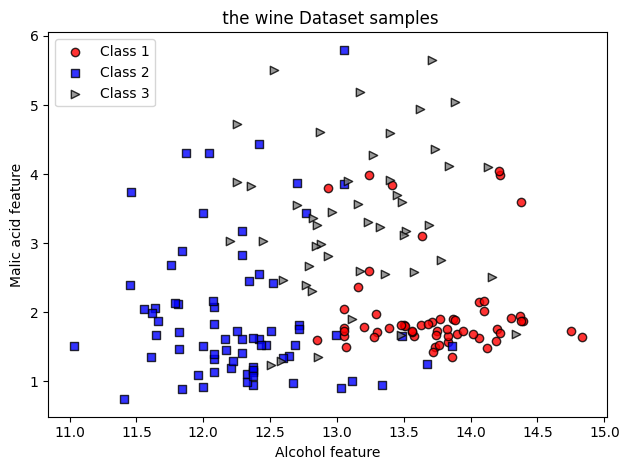

In [23]:
plot_class_samples (X=X,  y=y)

plt.title(' the wine Dataset samples')
plt.legend(loc='upper left')
plt.xlabel('Alcohol feature')
plt.ylabel('Malic acid feature')
plt.tight_layout()
plt.savefig('./LDA_img/the wine Dataset samples.png', dpi=200)
plt.show()

### Visualizing wine dataset  via t-distributed stochastic neighbor embedding(t-SNE)

In [24]:
tsne = TSNE(n_components=3, random_state=13) 
X_tsne = tsne.fit_transform(X)

In [25]:
def plot_class_samples_3D(X, y):
    
    markers = ('o', 's' , '>')
    colors = ('red', 'blue', 'yellow')
    
    ax = plt.axes((0, 0, 1, 1) ,projection='3d')
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter3D( X[y == cl, 0], 
                      X[y == cl, 1],
                      X[y == cl, 2],
                      alpha=0.8, 
                      c=colors[idx],
                      marker=markers[idx], 
                      label=f'Class {cl}', 
                      edgecolor='black')

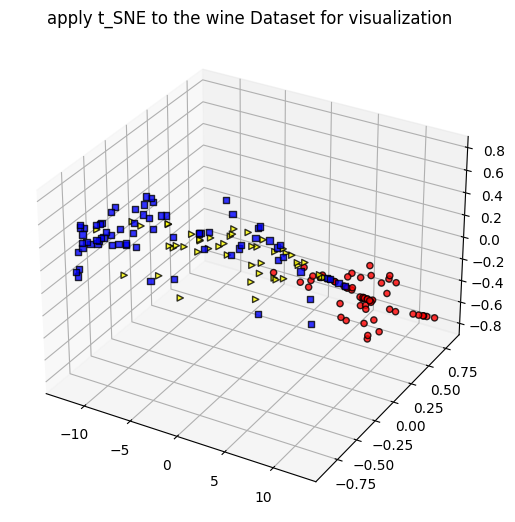

In [26]:
plot_class_samples_3D (X=X_tsne,  y=y)
plt.title('apply t_SNE to the wine Dataset for visualization')
plt.savefig('./LDA_img/t_SNE version of the wine Dataset.png', dpi=350)
plt.show()

In [27]:
sc = StandardScaler()
sc.fit(X)   
X_std = sc.transform(X) 

lda = LDA(n_components=2)   
X_LDA = lda.fit_transform(X_std , y)  

In [28]:
X_train, X_test, y_tain, y_test = train_test_split(X_LDA, y, test_size=0.30 , random_state=0, stratify=y)

print('shape of training samples is :\t',  X_train.shape)
print('shape of test data is:\t' ,   X_test.shape)

shape of training samples is :	 (123, 2)
shape of test data is:	 (54, 2)


In [29]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_tain)

SVC(kernel='linear', random_state=1)

In [35]:
y_pred_train_data= svm.predict(X_train)
y_pred_test_data= svm.predict(X_test)

In [36]:
accuracy_train = accuracy_score(y_tain, y_pred_train_data)
print("accuracy score for ttrain data is : {:.3f}".format(accuracy_train))

accuracy score for ttrain data is : 1.000


In [32]:
accuracy_test = accuracy_score(y_test, y_pred_test_data)
print("accuracy score for test data is : {:.3f}".format(accuracy_test))

accuracy score for test data is : 1.000


In [33]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('o', 's' , '>')
    colors = ('red', 'blue' ,'gray')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

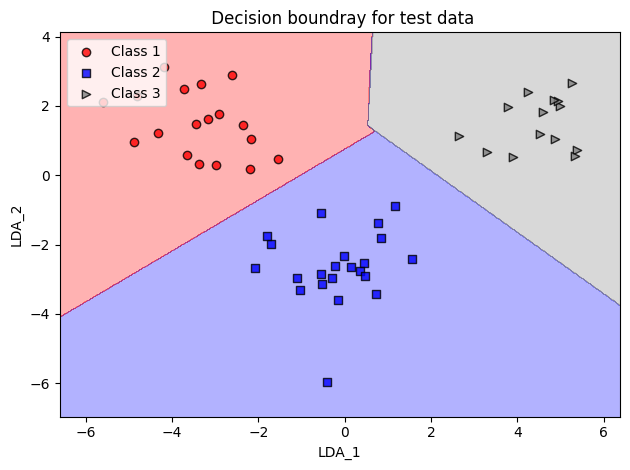

In [34]:
plot_decision_regions(X=X_test,  y=y_test ,classifier= svm)

plt.title(' Decision boundray for test data')
plt.legend(loc='upper left')
plt.xlabel('LDA_1')
plt.ylabel('LDA_2')
plt.tight_layout()
plt.savefig('./LDA_img/Decision boundray after apply LDA.png', dpi=300)
plt.show()